In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets//dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year']= dengue['Year'].astype('int')

In [8]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Questions and Insights</h1>

<h1>1.What is the total number of dengue deaths in the dataset?</h1>

In [11]:
dengue['Dengue_Cases'].sum()

np.int64(1147425)

<h1>Insight 1</h1>
<h1>The total number of dengue deaths in the dataset is 1147425.</h1>

<h1>2.Which year recorded the highest number of dengue cases?</h1>

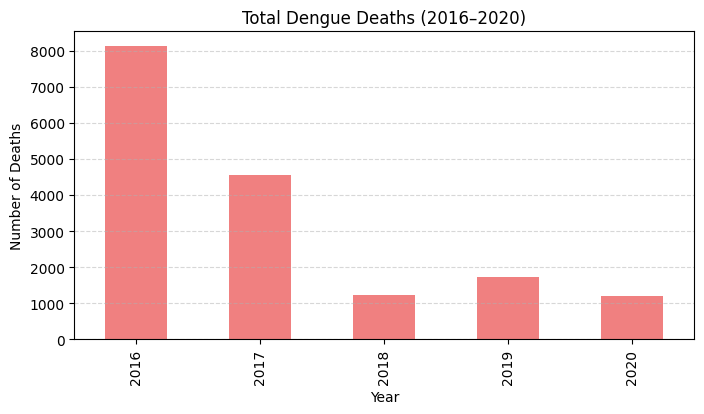

In [13]:
deaths_per_year = dengue.groupby('Year')['Dengue_Deaths'].sum()
plt.figure(figsize=(8,4))
deaths_per_year.plot(kind='bar', color='lightcoral')
plt.title('Total Dengue Deaths (2016–2020)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<h1>Insight 2</h1>

<h1>The year 2016 recorded the highest number of dengue deaths, indicating a major outbreak compared to other years.</h1>

<h1>Insight 3</h1>

<h1>After 2016, dengue deaths steadily decreased each year, suggesting improved control measures or better disease management over time.</h1>

<h1>3.What percentage of the total dengue cases came from the top 3 regions?</h1>

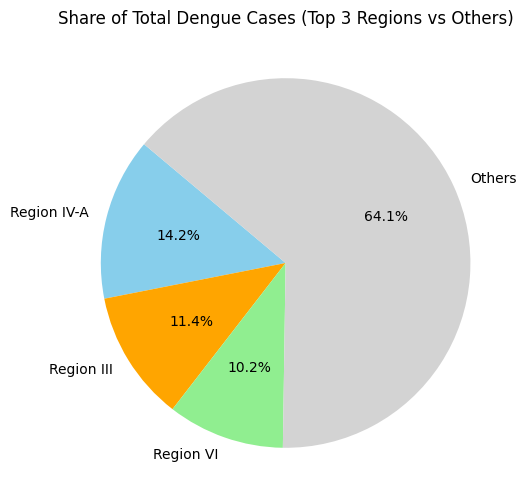

In [18]:
cases_per_region = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)

top3 = cases_per_region.head(3)
others = cases_per_region.sum() - top3.sum()
plt.figure(figsize=(6,6))
plt.pie([*top3, others], labels=[*top3.index, 'Others'],
        autopct='%1.1f%%', startangle=140, colors=['skyblue','orange','lightgreen','lightgrey'])
plt.title('Share of Total Dengue Cases (Top 3 Regions vs Others)')
plt.show()

<h1>Insight 4</h1>

<h1>The top 3 regions (Region IV-A, Region III, and Region VI) contributed a large part of total dengue cases.
This means dengue was more concentrated in a few high-population regions.</h1>

<h1>Insight 5</h1>

<h1>Region IV-A alone had the biggest share among the top 3 regions.
It shows that this area may have higher exposure or more reported dengue cases than others.</h1>

<h1>Insight 6</h1>

<h1>Around 64% of dengue cases came from other regions outside the top 3.
This means dengue is still a widespread issue and not limited to certain areas only.</h1>

<h1>4.Which month recorded the highest average number of dengue cases from 2016 to 2020?</h1>

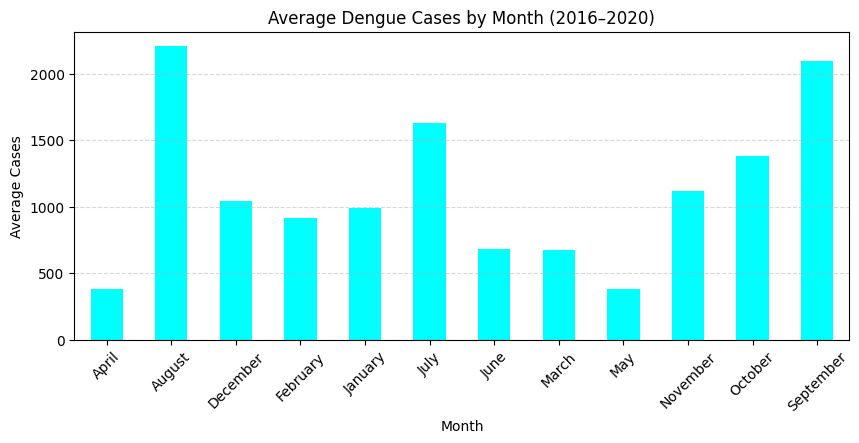

In [21]:
monthly_avg = dengue.groupby('Month')['Dengue_Cases'].mean()
plt.figure(figsize=(10,4))
monthly_avg.plot(kind='bar', color='cyan')
plt.title('Average Dengue Cases by Month (2016–2020)')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<h1>Insight 7</h1>

<h1>August recorded the highest average number of dengue cases from 2016 to 2020. This suggests that dengue infections peak during the rainy season when mosquitoes breed more easily.</h1>

<h1>Insight 8</h1>

<h1>The months from July to September show consistently high dengue cases. This means dengue transmission increases during mid-year and may need stronger prevention measures during these months.</h1>

<h1>5.Is there correlation between Dengue Cases and Dengue Death?</h1>

In [25]:
dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])

np.float64(0.03832213720419488)

<h1>Insight 9</h1>

<h1>With the result of 0.04 shows that having more dengue cases does not necessarily lead to more deaths, suggesting that medical care and prevention efforts may be effective in reducing fatalities.</h1>

<h1>6.Which year had the lowest dengue cases?</h1>

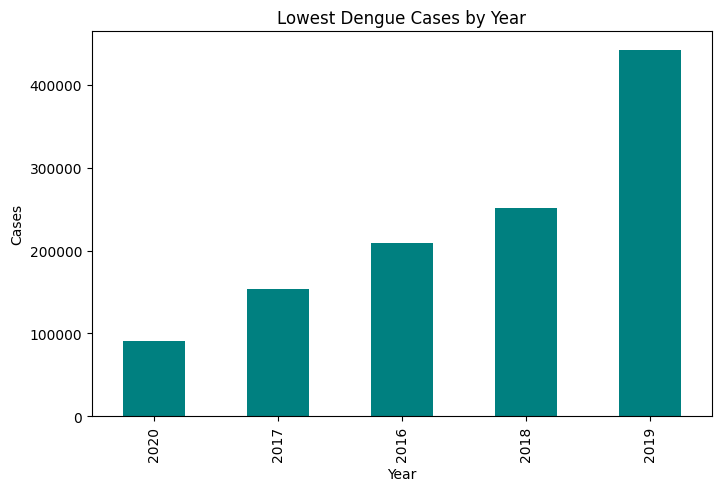

In [27]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()

yearly_cases.sort_values().plot(kind='bar', color='teal', figsize=(8,5))
plt.title('Lowest Dengue Cases by Year')
plt.ylabel('Cases')
plt.show()

<h1>Insight 10</h1>

<h1>In 2020, dengue cases were at their lowest, possibly due to COVID-19 lockdowns which reduced outdoor movement and limited mosquito exposure among people. </h1>

<h1>7.How did the number of dengue deaths change from 2016 to 2020?</h1>

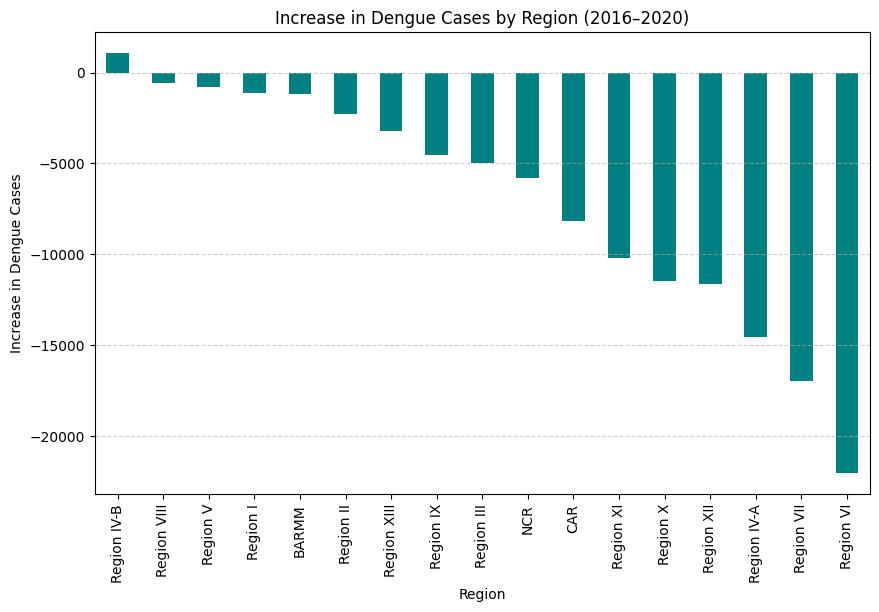

In [29]:
region_increase = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()
increase = region_increase[2020] - region_increase[2016]
increase_sorted = increase.sort_values(ascending=False)

#
plt.figure(figsize=(10,6))
increase_sorted.plot(kind='bar', color='teal')
plt.title('Increase in Dengue Cases by Region (2016–2020)')
plt.xlabel('Region')
plt.ylabel('Increase in Dengue Cases')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h1>Insight 11</h1>

<h1>Region VI, VII, XI had the biggest increase in Dengue Cases from 2016 to 2020. This means these areas were the most affected by dengue during those years.</h1>

<h1>Insight 12</h1>

<h1>Region IV-B, VIII, and V showed the smallest increase in dengue cases. This suggest that dengue spread was more controlled in these regions.</h1>


<h1>8.What are the top 3 regions that recorded the highest number of dengue cases in 2020?</h1>

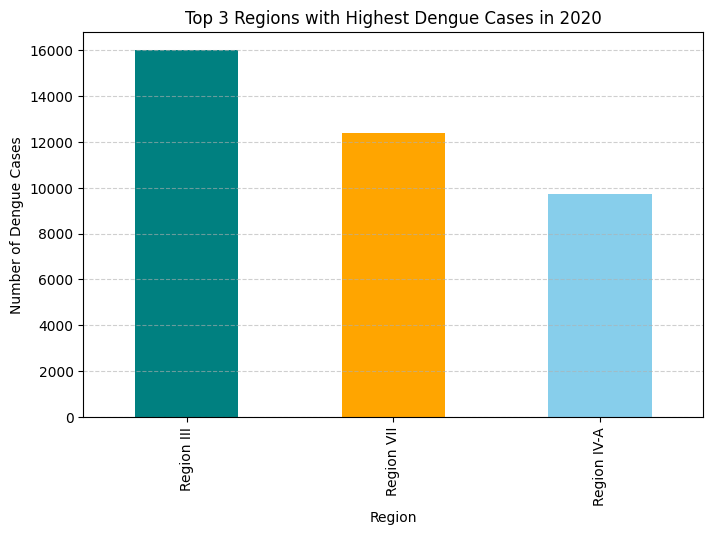

In [30]:
top3_2020 = dengue[dengue['Year'] == 2020].groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).head(3)


plt.figure(figsize=(8,5))
top3_2020.plot(kind='bar', color=['teal', 'orange', 'skyblue'])
plt.title('Top 3 Regions with Highest Dengue Cases in 2020')
plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h1>Insight 13</h1>

<h1>Region III recorded the highest number of dengue cases in 2020, showing it was the most affected area that year.</h1>

<h1>Insight 14</h1>

<h1>Region VII ranked second in dengue cases , indicating a serious spread of the disease in that region.</h1>

<h1>Insight 15</h1>

<h1>Region IV-A placed third, which means dengue continued to be a major health issue in several parts of the country. </h1>